<a href="https://colab.research.google.com/github/mounika8423/pythonbasics/blob/main/multi_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [3]:
cars=pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [5]:
cars.isnull().sum()

,0
HP,0
MPG,0
VOL,0
SP,0
WT,0


In [6]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


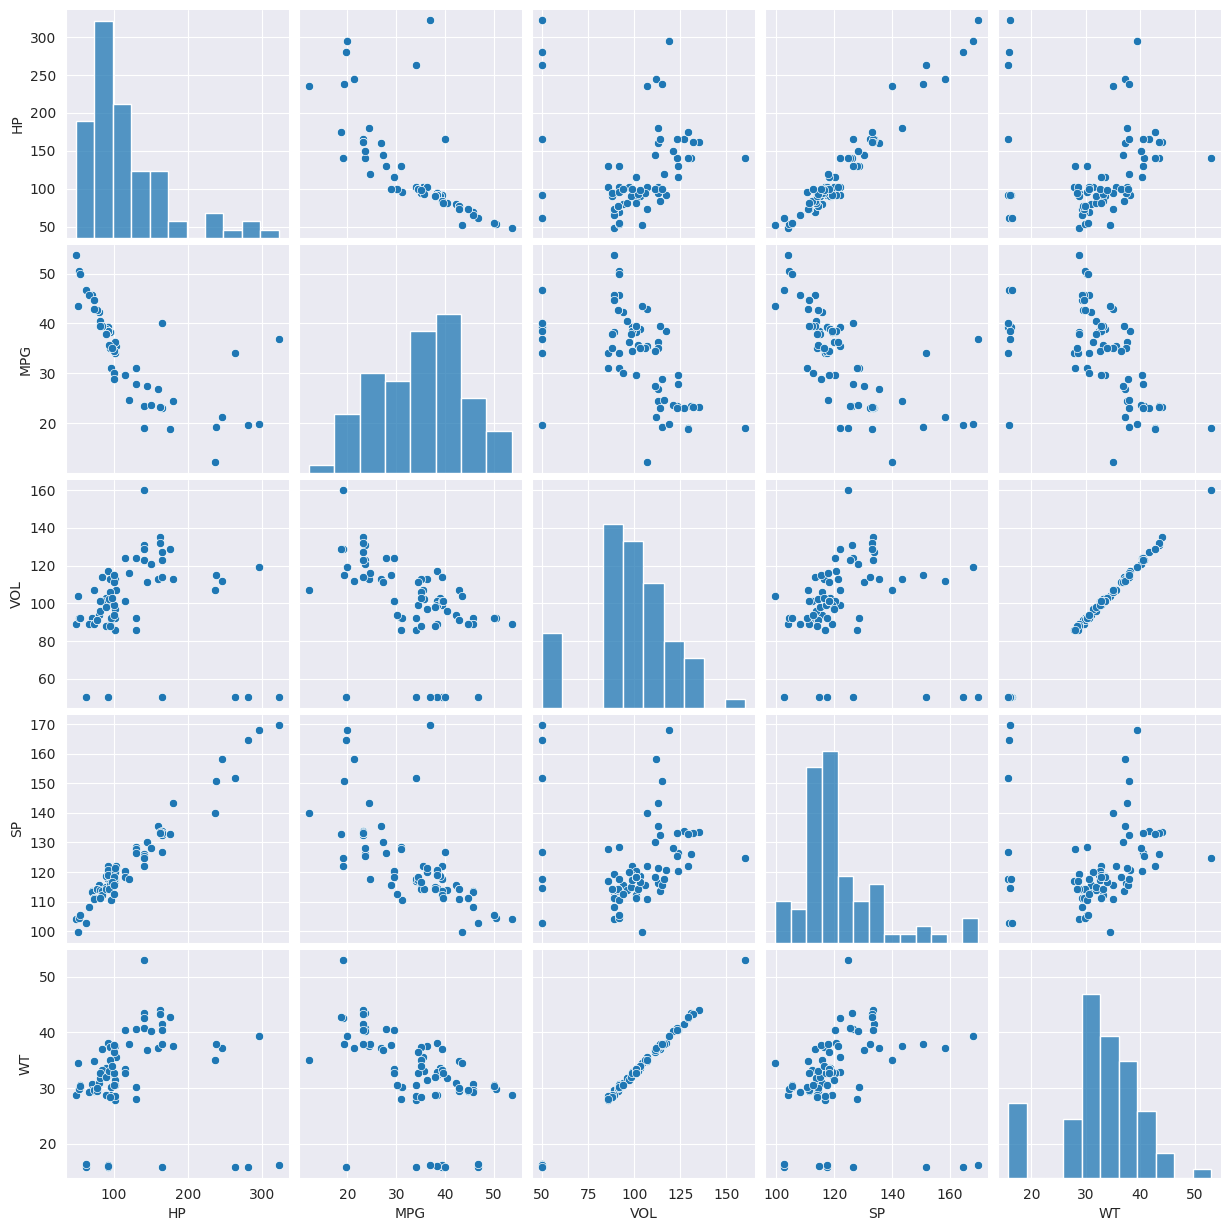

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [8]:
help(sns.set_style)

Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the parameters that control the general style of the plots.
    
    The style parameters control properties like the color of the background and
    whether a grid is enabled by default. This is accomplished using the
    matplotlib rcParams system.
    
    The options are illustrated in the
    :doc:`aesthetics tutorial <../tutorial/aesthetics>`.
    
    See :func:`axes_style` to get the parameter values.
    
    Parameters
    ----------
    style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured style.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    
    .. include:: ../docstrings/set_style.rst



In [9]:
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [10]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [11]:
print(model.tvalues,'\n',model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [13]:
ml_v=smf.ols('MPG~VOL',data=cars).fit()
print(ml_v.tvalues,'\n',ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [14]:
ml_w=smf.ols('MPG~WT',data=cars).fit()
print(ml_w.tvalues,'\n',ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [15]:
ml_wv=smf.ols('MPG~WT+VOL',data=cars).fit()
print(ml_wv.tvalues,'\n',ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [29]:
#vif means variance inflation factor
#this is used to remove a variable which is not needed or not important

In [19]:
#calculating vif
rsq_hp=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)
vif_hp

19.92658897499852

In [20]:
rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

In [21]:
rsq_vol=smf.ols('VOL~HP+WT+SP',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

In [22]:
rsq_sp=smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)

In [23]:
d1={'variable':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}

In [24]:
vif_frame=pd.DataFrame(d1)
vif_frame

,variable,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [25]:
#calculating vif
rsq_hp=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)
rsq_vol=smf.ols('VOL~HP+WT+SP',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)
rsq_sp=smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)
d1={'variable':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_frame=pd.DataFrame(d1)
vif_frame
#from the below value we can tell that vol has less vif than wt so we remove wt i.e, the value that is highest

,variable,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [28]:
#model validation techniques are of three types
#Q-Q plot
#residual plot
#residual vs regression plot

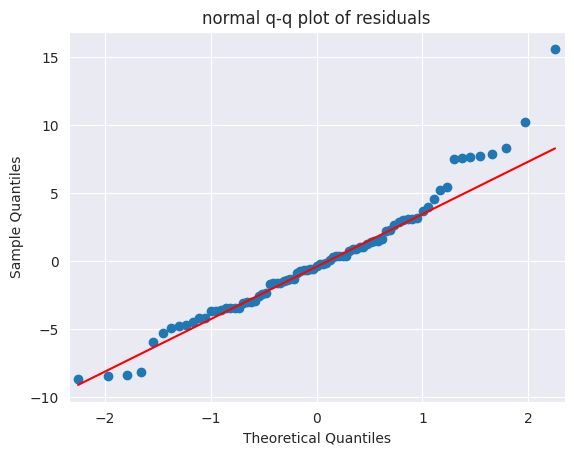

In [26]:
#Q-Q plot
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('normal q-q plot of residuals')
plt.show()

In [27]:
list(np.where(model.resid>10))

[array([ 0, 76])]

In [32]:
#residual plot for homoscedacity (model validation technique residual plot)
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

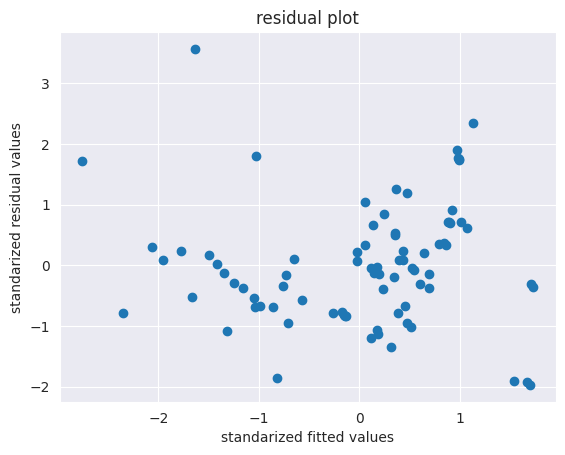

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('residual plot')
plt.xlabel('standarized fitted values')
plt.ylabel('standarized residual values')
plt.show()

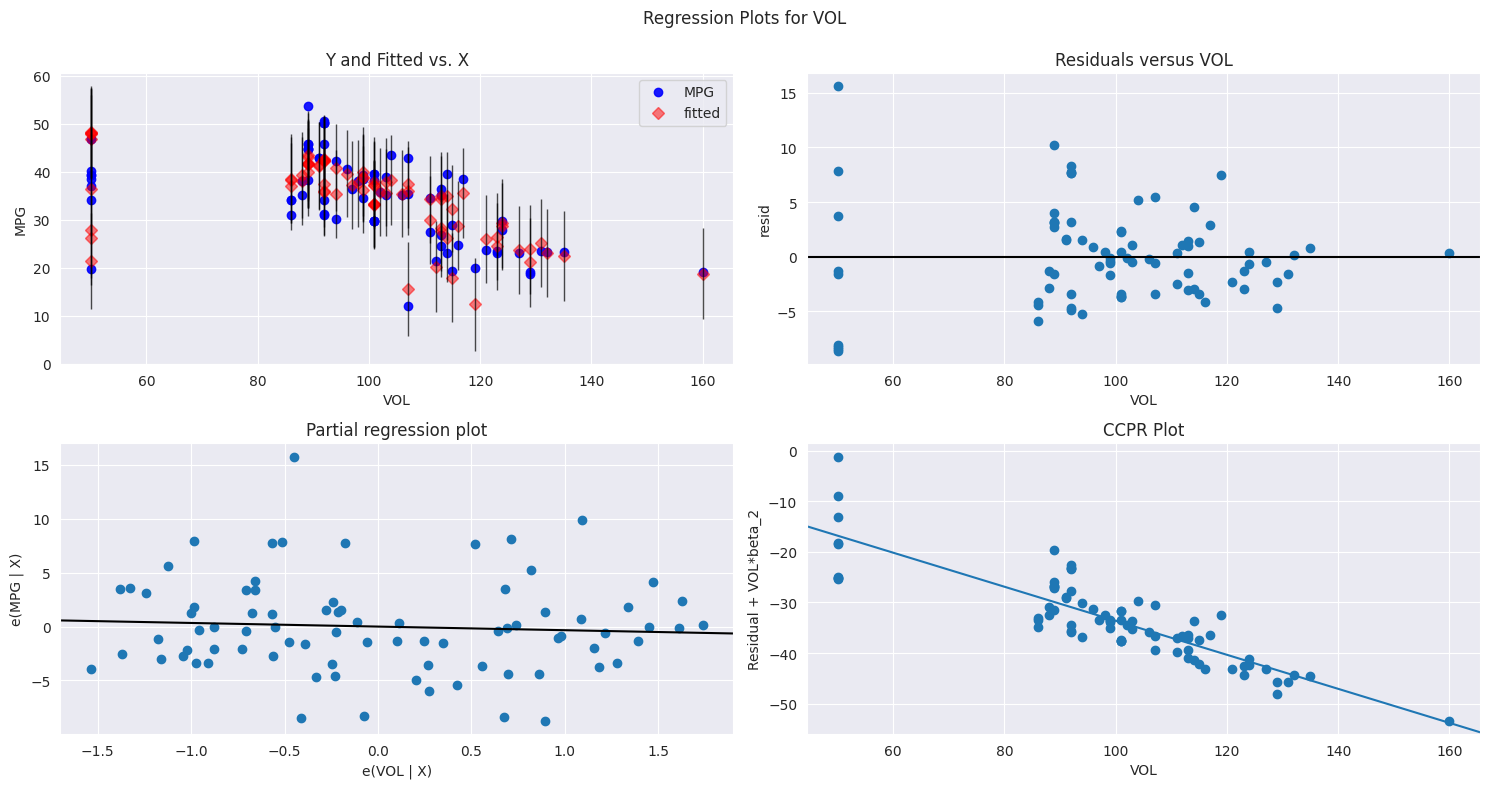

In [37]:
#residual vs regressors
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()

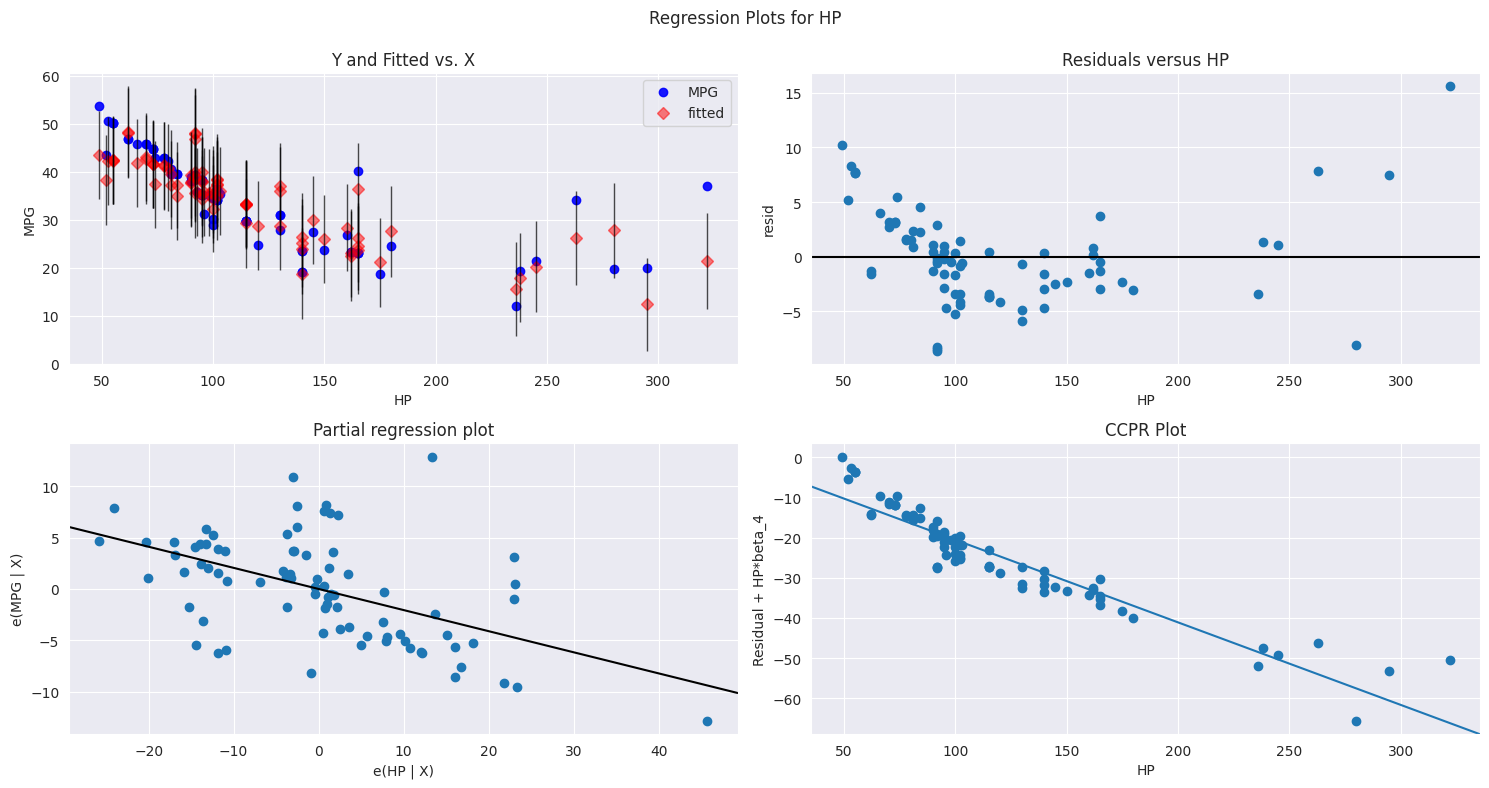

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

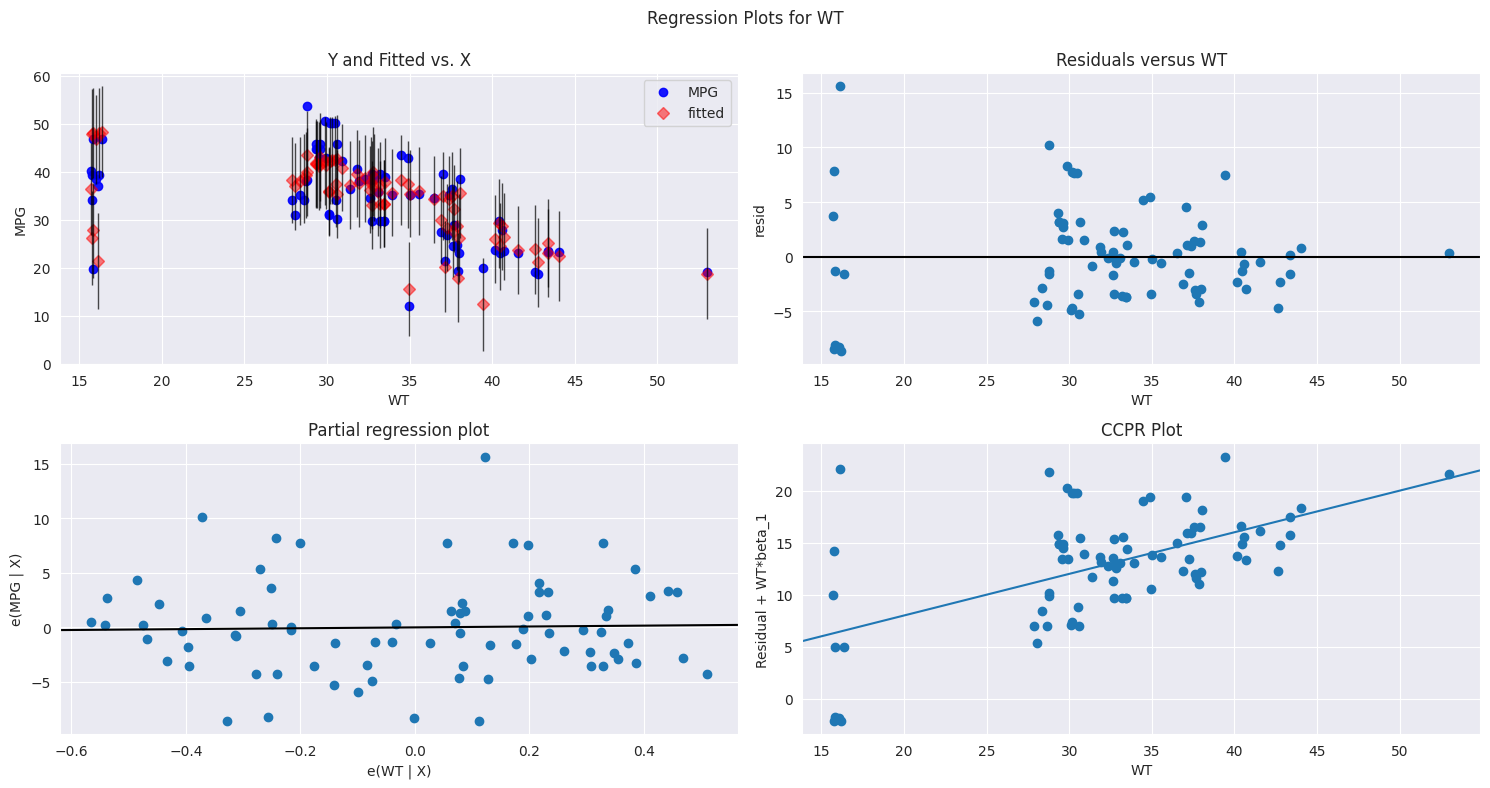

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'WT',fig=fig)
plt.show()

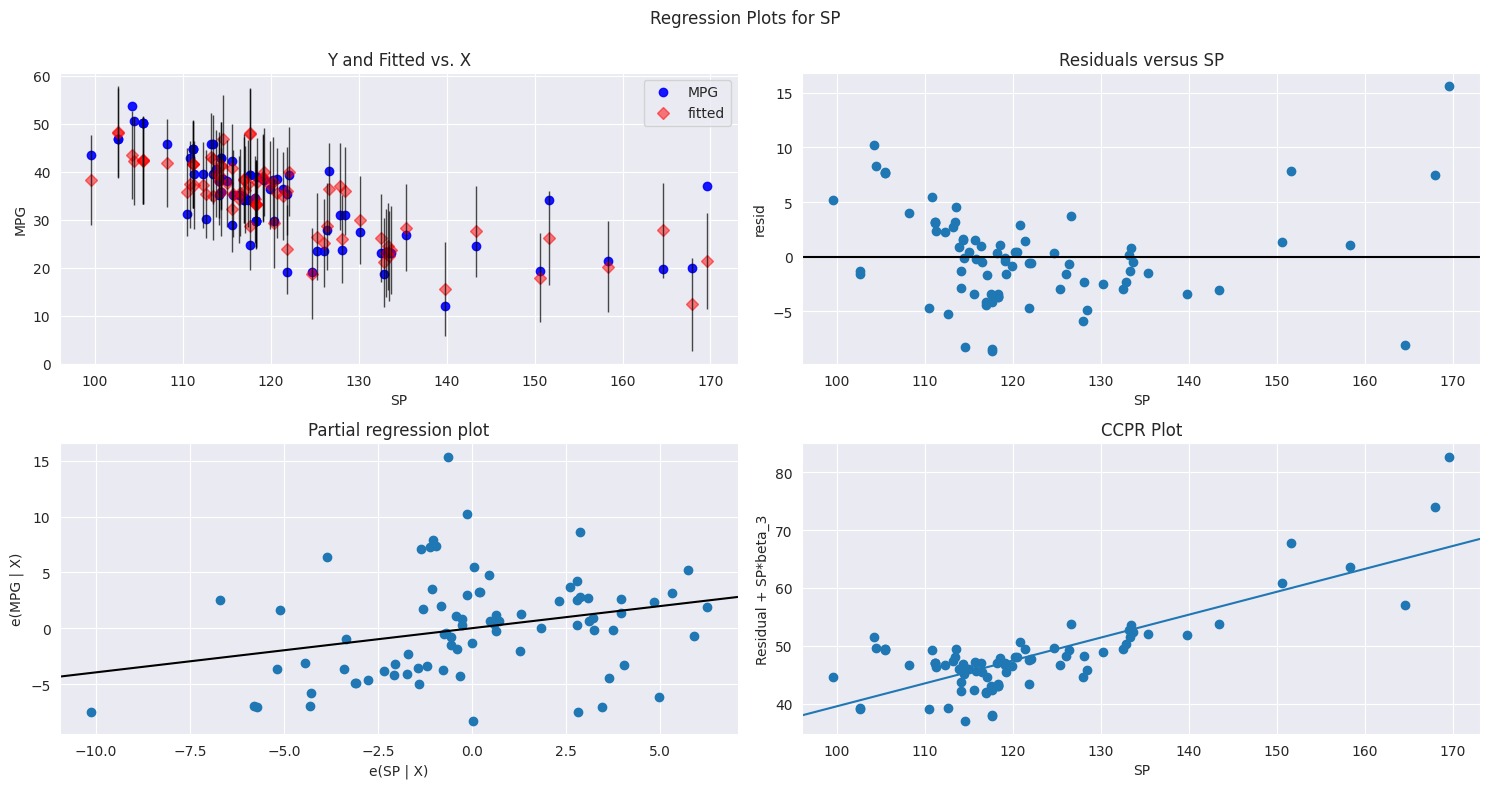

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,'SP',fig=fig)
plt.show()

In [42]:
#model deletion diagnostics
#cooks distance
#leverage value

In [43]:
#cooks distance
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

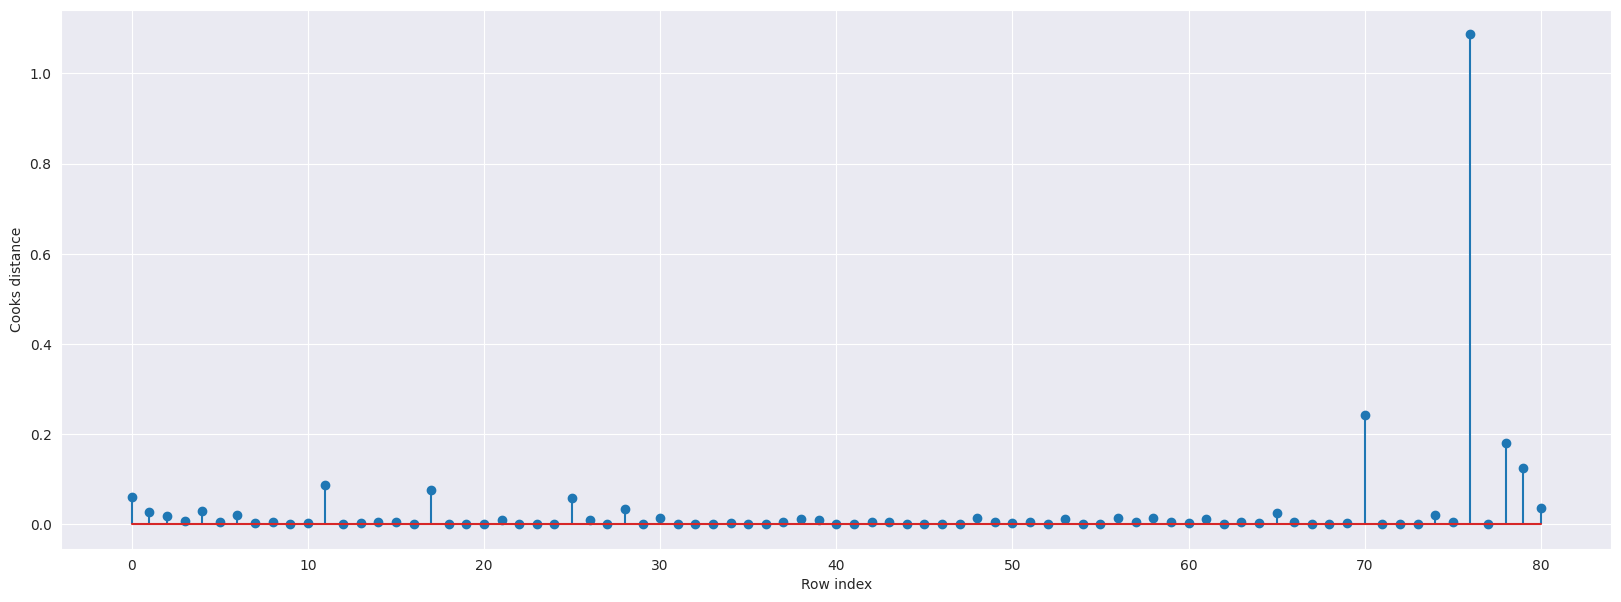

In [45]:
#plot influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [46]:
(np.argmax(c),np.max(c))

(76, 1.0865193998179699)

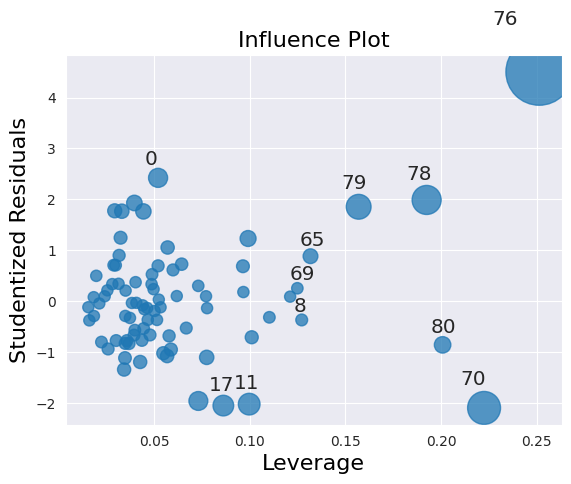

In [47]:
#leverage value method
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [50]:
k=1
n=81
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.07407407407407407

In [52]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [53]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [55]:
#improving model
cars_new=pd.read_csv('Cars.csv')

In [60]:
car1=cars_new.drop(cars_new.index[[70,76]],axis=0).reset_index()
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [57]:
car1=car1.drop(['index'],axis=1)

In [58]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [63]:
#build model

#exclude variable wt and generate r-squared and aic values
final_ml_v=smf.ols('MPG~VOL+SP+HP',data=cars).fit()

In [64]:
#exclude variable vol and generate r-squared and aic values
final_ml_w=smf.ols('MPG~WT+SP+HP',data=cars).fit()

In [66]:
(final_ml_w.rsquared,final_ml_w.aic,final_ml_w.bic)

(0.7694828139983458, 476.29927501529767, 485.87707163398744)

In [67]:
(final_ml_v.rsquared,final_ml_v.aic,final_ml_v.bic)

(0.770368341321302, 475.9875158854609, 485.56531250415065)

In [69]:
#volume has lesser aic and bic
model_influence_v=final_ml_v.get_influence()
(c_v,_)=model_influence_v.cooks_distance

Text(0, 0.5, 'cooks dist')

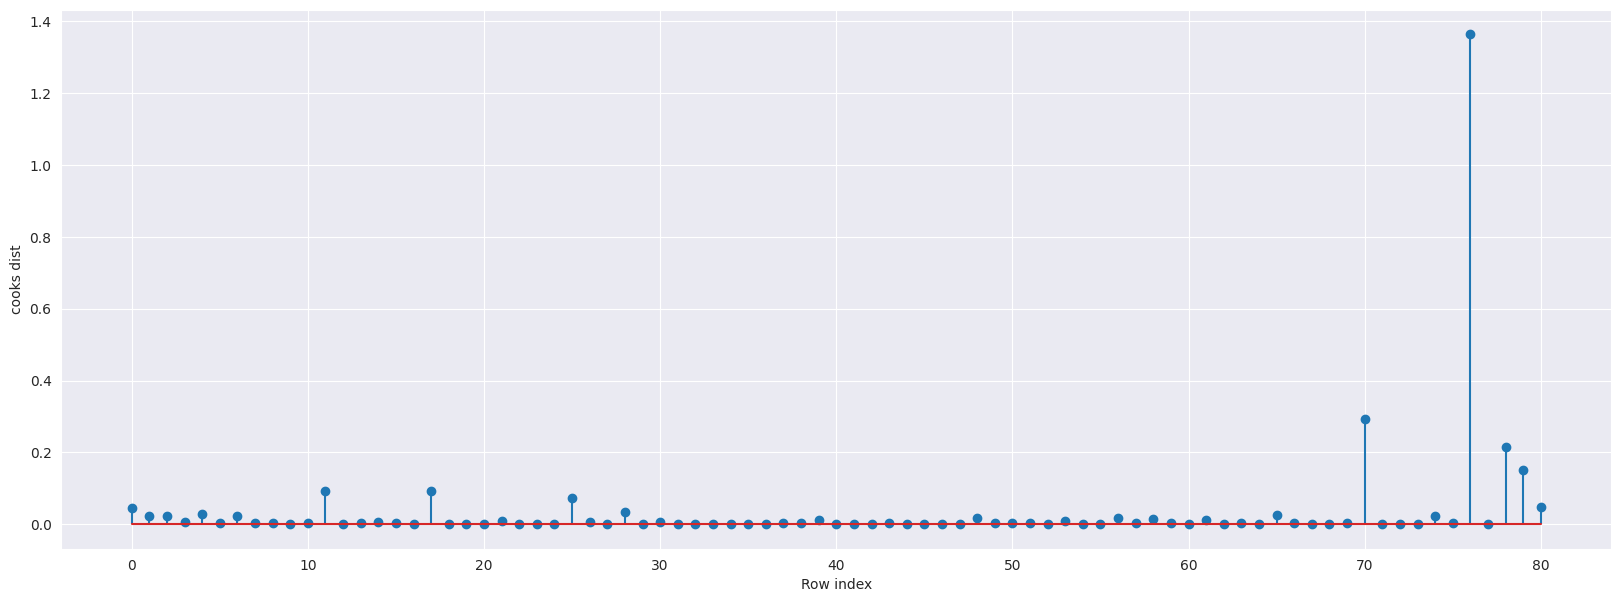

In [70]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.round(c_v,3))
plt.xlabel('Row index')
plt.ylabel('cooks dist')

In [71]:
(np.argmax(c_v),np.max(c_v))

(76, 1.364174386910332)

In [73]:
car2=car1.drop(car1.index[[76]],axis=0)
car2.shape

(78, 6)

In [74]:
car2

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
73,74,140,19.086341,129,121.864163,42.618698
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
77,79,295,19.833733,119,167.944460,39.423099


In [76]:
car3=car2.reset_index()

In [92]:
car3=car3.drop(['level_0'],axis=1)

In [93]:
car4=car3.drop(['index'],axis=1)

In [94]:
car4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,295,19.833733,119,167.944460,39.423099


In [78]:
#build model on new data
final_ml_v=smf.ols('MPG~VOL+SP+HP',data=cars).fit()

In [80]:
model_influence_v=final_ml_v.get_influence()
(c_v,_)=model_influence_v.cooks_distance

Text(0, 0.5, 'cooks dist')

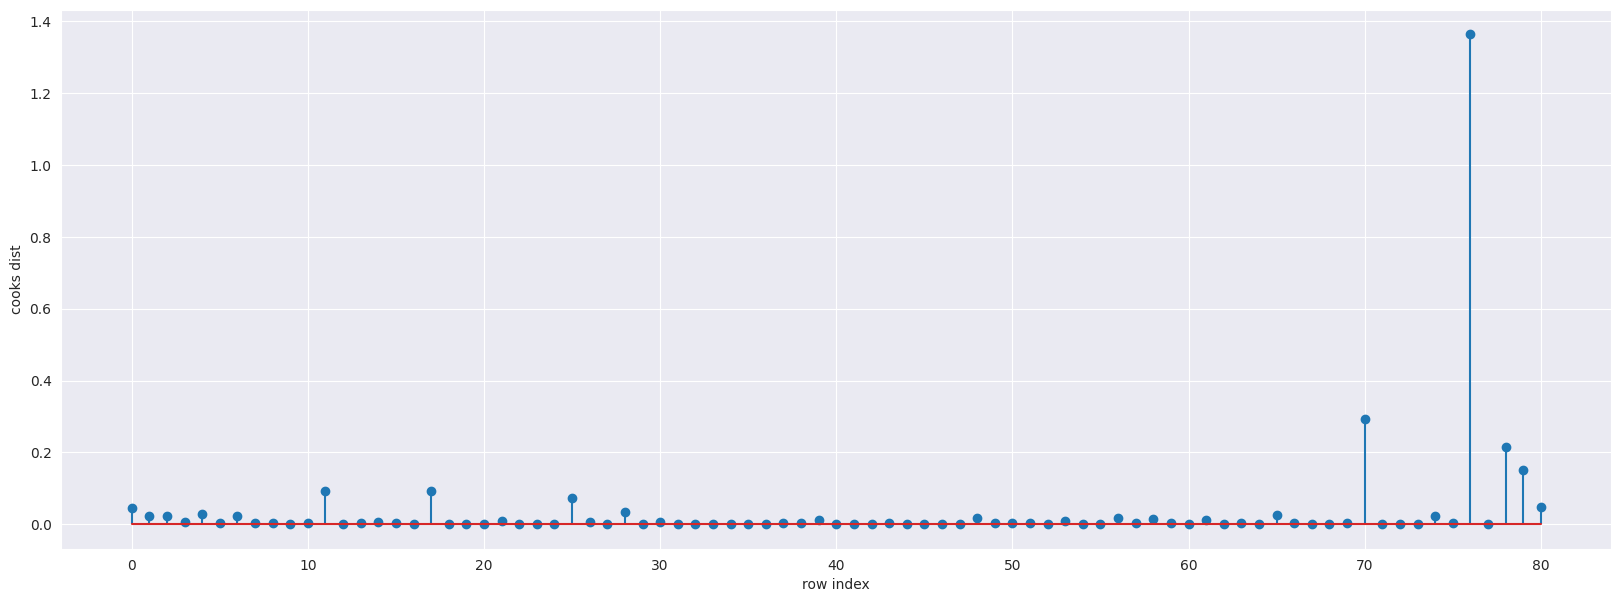

In [96]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.round(c_v,3))
plt.xlabel('row index')
plt.ylabel('cooks dist')

In [97]:
(np.argmax(c_v),np.max(c_v))

(76, 1.364174386910332)

In [98]:
car5=car4.drop(car1.index[[76]],axis=0)
car5

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [102]:
#check accuracy of model
final_ml_v=smf.ols('MPG~VOL+SP+HP',data=car5).fit()

In [103]:
(final_ml_v.rsquared,final_ml_v.aic)

(0.8669636111859063, 409.4153062719508)

In [104]:
model_influence_v=final_ml_v.get_influence()
(c_v,_)=model_influence_v.cooks_distance

Text(0, 0.5, 'cooks dist')

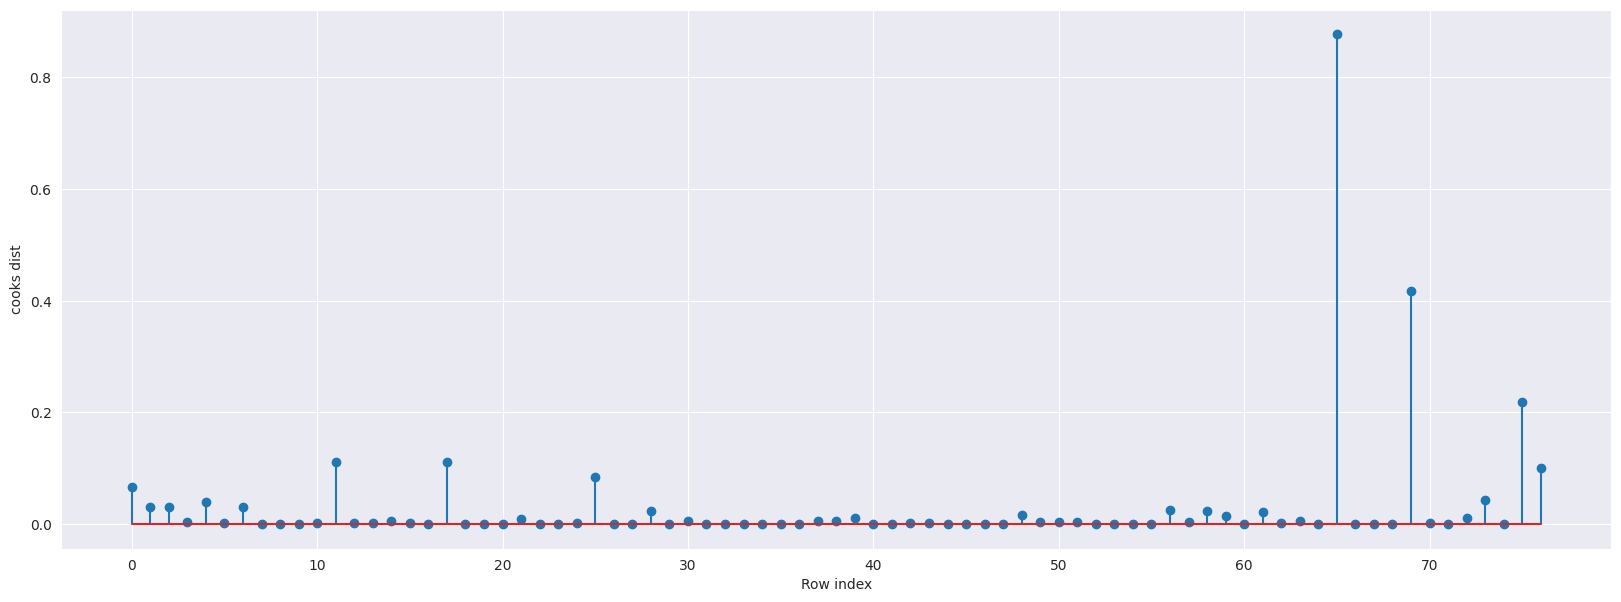

In [106]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.round(c_v,3))
plt.xlabel('Row index')
plt.ylabel('cooks dist')

In [107]:
(np.argmax(c_v),np.max(c_v))

(65, 0.8774556986296674)

In [108]:
new_data=pd.DataFrame({'HP':40,'VOL':95,'SP':102,'WT':35},index=[1])

In [109]:
final_ml_v.predict(cars_new.iloc[0:5,])

,0
0,45.428872
1,43.992392
2,43.992392
3,43.508150
4,44.085858


In [110]:
pred_y=final_ml_v.predict(cars_new)

In [111]:
pred_y

,0
0,45.428872
1,43.992392
2,43.992392
3,43.508150
4,44.085858
...,...
76,7.165876
77,12.198598
78,14.908588
79,4.163958
